#LSTM Tagging Article French Model




This IA moddel is similar to the previous one, execpt it can tag French articles.

##Import librairies

In [0]:
!pip install pyunpack
!pip install googletrans

In [0]:
from googletrans import Translator

import os
from os.path import isfile, join
from os import walk
from __future__ import print_function

from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Dropout
from keras.layers import LSTM
from keras.datasets import imdb
import numpy as np

from sklearn.model_selection import train_test_split
import pickle
import pandas as pd

import zipfile
import keras
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from pyunpack import Archive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Import Englis texts

In [0]:
#Zip file to import and decompress

with zipfile.ZipFile("FR-bbc-fulltext.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [0]:
!rm -rf "edited-bbc-fulltext/bbcFR"

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|,;:&$£ù#§?!_^@]')

content = "[/(){}\[\]\|@,;:]&$£ù#/§?!_^@"
newcontent = REPLACE_BY_SPACE_RE.sub('',content)
print(newcontent)

\\\-Merde


## Translate English texts to French

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|,.;:&$£ù#§?!_^@-]')

#Create dataframe to store texts and their respective label
df = pd.DataFrame(columns=['Text','Label'])

#Get labels from directories names  
label_list = []
for (dirpath, dirnames, filenames) in walk(os.path.join("edited-bbc-fulltext/bbc")):
    label_list.extend(dirnames)

#Store texts and labels in the dataframe
i=0 
k=0 

!rm -rf "edited-bbc-fulltext/bbcFR"
os.mkdir("edited-bbc-fulltext/bbcFR")
for label in label_list:
    os.mkdir("edited-bbc-fulltext/bbcFR/"+label)
    
    if label == "tech" :
      print(label)
      for (dirpath, dirnames, filenames) in walk(os.path.join("edited-bbc-fulltext/bbc",label)):
          for file in filenames[k:]:
              with open('edited-bbc-fulltext/bbc/'+label+"/"+file, 'r') as content_file:
                content = content_file.read()
              content = REPLACE_BY_SPACE_RE.sub('',content)
              #Translate text in French
              print(file)
              #print(content)
              if len(content) < 15000 :
                  translator = Translator()
                  contentTranslated = translator.translate(content, dest='fr')

                  #Save text translated in French
                  fileName = re.sub("[^0-9]", "", file)
                  fileToSave = open('edited-bbc-fulltext/bbcFR/'+label+"/"+fileName+"FR.txt","w+")
                  fileToSave.write(str(contentTranslated))
              #print(contentTranslated)
              i = i + 1

FileNotFoundError: ignored

In [0]:
#Compress folder
import zipfile
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))
zipf = zipfile.ZipFile('bbcTechFR.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('edited-bbc-fulltext/bbcFR/tech', zipf)
zipf.close()

##Import Translated French Texts

In [0]:
#Zip file to import and decompress

with zipfile.ZipFile("FR-bbc-fulltext.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [0]:
#Create dataframe to store texts and their respective label
df = pd.DataFrame(columns=['Text','Label'])

#Get labels from directories names  
label_list = []
for (dirpath, dirnames, filenames) in walk(os.path.join("FR-bbc-fulltext/bbcFR")):
    label_list.extend(dirnames)

print(label_list)

#Store texts and labels in the dataframe
i=0       
for label in label_list:
    for (dirpath, dirnames, filenames) in walk(os.path.join("FR-bbc-fulltext/bbcFR",label)):
        for file in filenames:
            with open('FR-bbc-fulltext/bbcFR/'+label+"/"+file, 'r') as content_file:
              content = content_file.read()
            df.loc[i] = [content, label]
            i = i + 1

['business', 'tech', 'sport', 'entertainment', 'politics']


In [0]:
print(df)

                                                   Text     Label
0     Translated(src=en, dest=fr, text=Le personnel ...  business
1     Translated(src=en, dest=fr, text=la croissance...  business
2     Translated(src=en, dest=fr, text=économie libé...  business
3     Translated(src=en, dest=fr, text=UE visant à a...  business
4     Translated(src=en, dest=fr, text=Boeing ordre ...  business
...                                                 ...       ...
2215  Translated(src=en, dest=fr, text=L'espoir de B...  politics
2216  Translated(src=en, dest=fr, text=Top affrontem...  politics
2217  Translated(src=en, dest=fr, text=Paille attaqu...  politics
2218  Translated(src=en, dest=fr, text=Est-ce que le...  politics
2219  Translated(src=en, dest=fr, text=Brown hausse ...  politics

[2220 rows x 2 columns]


##Split data in test set and train set

In [0]:
#We split the main dataframe in four series :
# - X_train : serie wich contains texts for the train set 
# - X_test : serie wich contains texts for the test set 
# - y_train : serie which contains labels of the texts from X_train
# - y_test : serie which contains labels of the texts from X_test

X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Label"], test_size=0.33, random_state=42)

print("Train set :")
print("Shape of the train set : ")
print(X_train.shape)
print(X_train)
print("\n")
print(y_train)
print(y_train.shape)

print("\n")
print("\n")

print("Test set :")
print("Shape of the test set : ")
print(X_test.shape)
print(X_test)
print("\n")
print(y_test)
print(y_test.shape)

Train set :
Shape of the train set : 
(1487,)
158     Translated(src=en, dest=fr, text=GSK vise à ar...
905     Translated(src=en, dest=fr, text=brassage lign...
272     Translated(src=en, dest=fr, text=La faiblesse ...
614     Translated(src=en, dest=fr, text=Jeux de comba...
1868    Translated(src=en, dest=fr, text=de l'avant en...
                              ...                        
1638    Translated(src=en, dest=fr, text=Ring of Fire ...
1095    Translated(src=en, dest=fr, text=O'Gara se com...
1130    Translated(src=en, dest=fr, text=Guêpes 3137 L...
1294    Translated(src=en, dest=fr, text=Collins nommé...
860     Translated(src=en, dest=fr, text=Spams séduise...
Name: Text, Length: 1487, dtype: object


158          business
905              tech
272          business
614              tech
1868         politics
            ...      
1638    entertainment
1095            sport
1130            sport
1294            sport
860              tech
Name: Label, Length: 1487, dtype

##Preprocessing datas

In [0]:
#Cleaning datas 
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('french'))

#Remove specific words


X_train_cleaned = list()
X_test_cleaned = list()

for x in X_train :
    text = str(x)
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    text = BAD_SYMBOLS_RE.sub(' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    X_train_cleaned.append(text)

for x in X_test :
    text = str(x)
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub(' ', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    X_test_cleaned.append(text)

print(X_test_cleaned)   

['translated src dest fr text uk cha vision rappe csi ad cha vision five a critiqu e envoi offensive menace mat riel publicitaire spectateurs nouveau spectacle sc assassiner scientifiques cinq milliers dossiers faux envoy poste compris photos victimes meurtre e mail sugg rant destinataire tait harcel e tueur rie suite plaintes advertising standards authority contact e cinq cesser promotion criminalit montrent csiny cinq admis envoy 55000 paquets promotion a boucha mat riel promotion a envoy enveloppe brune type utilis enqu teurs rie spin off rie csi crime scene investigation tr r ussie fonctionne galement cinq pack comprend galement photos preuves dico gales sc crime voulait affiche logo imprim grand csiny fond cinq dit re u 100 plaintes surpris r action parce tait vident mat riel promotion drame cinq porte parole a clar lumi re efforts faits rendre nature contenu mani re transparente surpris tr petite minorit b ficiaires tort comme toute autre chose tout monde a envoy cette promotion 

In [0]:
#Data preprocessing can be done 
#Change num_words
tokenizer = keras.preprocessing.text.Tokenizer(num_words=500, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
X_train_temp = list()
X_test_temp = list()

for x in X_train_cleaned :
    x_preprocessed = text_to_word_sequence(x)
    X_train_temp.append(x_preprocessed)
    #print(x_preprocessed)

for x in X_test_cleaned :
    x_preprocessed = text_to_word_sequence(x)
    X_test_temp.append(x_preprocessed)
    #print(x_preprocessed)

docs = X_train_temp + X_test_temp

tokenizer.fit_on_texts(docs)

X_train_preprocessed = tokenizer.texts_to_sequences(X_train_temp)
X_test_preprocessed = tokenizer.texts_to_sequences(X_test_temp)

In [0]:
#Find max size
maxTrain = 0
for listWord in X_train_preprocessed :
  size = len(listWord)
  if size > maxTrain :
    maxTrain = size
maxTrain

maxTest = 0
for listWord in X_test_preprocessed :
  size = len(listWord)
  if size > maxTest :
    maxTest = size  
maxTest

maxShape = 0
if maxTest > maxTrain :
  maxShape = maxTest
else :
  maxShape = maxTrain

maxShape

750

In [0]:
#Summarize
print(tokenizer.word_counts)
print(tokenizer.document_count)
print(tokenizer.word_index)
print(tokenizer.word_docs)

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

OrderedDict([('translated', 2215), ('src', 2215), ('dest', 2215), ('fr', 2331), ('text', 2215), ('gsk', 2), ('vise', 86), ('arr', 275), ('ter', 174), ('profiteurs', 1), ('sida', 21), ('plus', 5747), ('grands', 249), ('fabricants', 74), ('mondiaux', 26), ('dicaments', 89), ('hivaids', 24), ('a', 23057), ('lanc', 182), ('initiative', 64), ('visant', 103), ('lutter', 81), ('contre', 1213), ('contrebande', 5), ('pilules', 4), ('moins', 666), ('chers', 24), ('fournis', 7), ('pays', 1244), ('africains', 19), ('pauvres', 93), ('europe', 454), ('soutenir', 99), ('revente', 2), ('prix', 1122), ('beaucoup', 1001), ('lev', 306), ('soci', 648), ('glaxosmithkline', 4), ('modifier', 27), ('emballage', 5), ('changer', 116), ('couleur', 42), ('actuellement', 253), ('offerts', 20), ('veloppement', 241), ('vertu', 94), ('accord', 424), ('humanitaire', 4), ('estime', 94), ('entreprises', 864), ('perdent', 13), ('centaines', 61), ('millions', 640), ('dollars', 73), ('chaque', 310), ('ann', 2040), ('e', 49

In [0]:
X_train = sequence.pad_sequences(X_train_preprocessed, maxlen=maxShape, value=0)
X_test = sequence.pad_sequences(X_test_preprocessed, maxlen=maxShape, value=0)


print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(X_train)

x_train shape: (1487, 750)
x_test shape: (733, 750)
y_train shape: (1487,)
y_test shape: (733,)
[[ 0  0  0 ... 14 13 21]
 [ 0  0  0 ... 14 13 21]
 [ 0  0  0 ... 14 13 21]
 ...
 [ 0  0  0 ... 14 13 21]
 [ 0  0  0 ... 14 13 21]
 [ 0  0  0 ... 14 13 21]]


In [0]:
#Labels = 'politics', 'sport', 'business', 'entertainment' and 'tech'
v_temp = []

y_train_temp = pd.get_dummies(y_train, prefix="Label")
y_test_temp = pd.get_dummies(y_test, prefix="Label")
  
y_train = y_train_temp
y_test = y_test_temp

print(y_train)

      Label_business  Label_entertainment  ...  Label_sport  Label_tech
158                1                    0  ...            0           0
905                0                    0  ...            0           1
272                1                    0  ...            0           0
614                0                    0  ...            0           1
1868               0                    0  ...            0           0
...              ...                  ...  ...          ...         ...
1638               0                    1  ...            0           0
1095               0                    0  ...            1           0
1130               0                    0  ...            1           0
1294               0                    0  ...            1           0
860                0                    0  ...            0           1

[1487 rows x 5 columns]


##Model

In [0]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import SpatialDropout1D
from keras.layers import GlobalMaxPooling1D


# Parameters
max_features = 5000
# cut texts after this number of words (among top max_features most common words)
batch_size = 200
NUM_EPOCHS = 20

earlystop= EarlyStopping(patience=5, monitor="val_loss")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_acc", patience=2, verbose=1, factor=0.5, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxShape))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=NUM_EPOCHS,
          validation_data=(X_test, y_test),
          callbacks=callbacks)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 1487 samples, validate on 733 samples
Epoch 1/20
1487/1487 [==============================] - 17s 11ms/step - loss: 1.6066 - acc: 0.2293 - val_loss: 1.6070 - val_acc: 0.2019
Epoch 2/20
1487/1487 [==============================] - 15s 10ms/step - loss: 1.5993 - acc: 0.2434 - val_loss: 1.6041 - val_acc: 0.2019
Epoch 3/20
1487/1487 [==============================] - 15s 10ms/step - loss: 1.5867 - acc: 0.2441 - val_loss: 1.5844 - val_acc: 0.2005

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
1487/1487 [==============================] - 15s 10ms/step - loss: 1.5409 - acc: 0.2730 - val_loss: 1.5277 - val_acc: 0.3602
Epoch 5/20
1487/1487 [==============================] - 15s 10ms/step - loss: 1.4140 - acc: 0.4082 - val_loss: 1.4591 - val_acc: 0.4270
Epoch 6/20
1487/1487 [==============================] - 15s 10ms/step - loss: 1.3705 - acc: 0.4270 - val_loss: 1.3420 - val_acc: 0.4352
Epoch 7/20
1487/1487 [==========

##Test model

In [0]:
topredict = np.array([X_train[0]])
result = model.predict(topredict)
print(result)

[[0.86903006 0.02013962 0.01669001 0.04672788 0.0474124 ]]


##Save model

In [0]:
#Save model
model_json = model.to_json()
model.save_weights("model.h5")
with open("model.json", "w") as json_file:
    json_file.write(model_json)

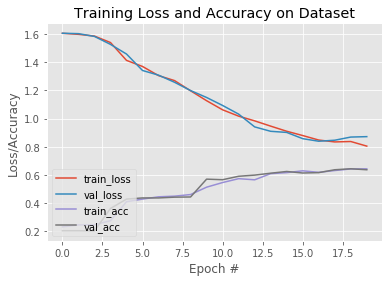

In [0]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")